In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle as pkl
import os
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

import sys
sys.path.append('./scripts/')
import extract_tool_results

In [6]:
# this is only for correcting the labels while plotting
tool_name_trans_dic = {
    'cc':'CellChat',
    'cpdb':'CellPhoneDB',
    'italk':'iTALK',
    'scr':'SingleCellSignalR',
    'natmi':'NATMI',
    'icellnet':'ICELLNET',
    'nichenet':'NicheNet',
    'scmlnet':'scMLnet',
    'connectome':'Connectome',
    'cytotalk':'CytoTalk',
    'cellcall':'CellCall',
    'domino':'Domino',
    'stlearn':'stLearn',
    'cpdb_v3':'CellPhoneDB v3',
    'giotto':'Giotto',
    'base_line':'LR product'
        }

def trans_ip_symbol(ip):
    ip = ip.split('_')
    if len(ip) > 2:
        part_b = '({})'.format('+'.join(ip[1:]))
    else:
        part_b = ip[1]
    return '{} - {}'.format(ip[0],part_b)


# all rounds DES box plot

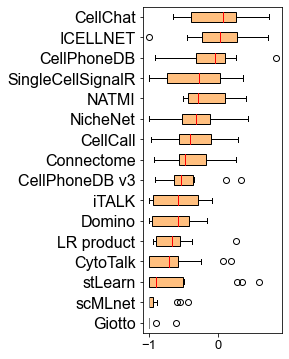

LR product          -0.670551
CellChat             0.082322
CellCall            -0.407765
Connectome          -0.469061
CellPhoneDB         -0.037059
CellPhoneDB v3      -0.537577
CytoTalk            -0.702257
Domino              -0.583836
Giotto              -1.000000
ICELLNET             0.038850
iTALK               -0.583836
NATMI               -0.289946
NicheNet            -0.322064
scMLnet             -1.000000
SingleCellSignalR   -0.279069
stLearn             -0.898671
dtype: float64


In [8]:
res_dic_files = [
    './simulation_intestine/simulation_round{}/evaluation_result/pkl/tool_ES_dic_sinkhorn2.pkl'.format(i) for i in range(1,6)
] + [
    './simulation_cortex/simulation_round{}/evaluation_result/pkl/tool_ES_dic_sinkhorn2.pkl'.format(i) for i in range(1,6)
] + [
    './simulation_PDAC/simulation_round{}/evaluation_result/pkl/tool_ES_dic_sinkhorn2.pkl'.format(i) for i in range(1,6)
]

out_dir = './data_simulation/all_rounds'

res_dic_list = []
for tmp_f in res_dic_files:
    with open(tmp_f,'rb') as f:
        tmp_dic = pkl.load(f)
    res_dic_list.append(tmp_dic)

# compute & plot DES
extract_tool_results.plot_ES_multi_scatter(
    res_dic_list, tool_name_trans_dic, 
    '{}/figure'.format(out_dir),
    fontsize=16, fontsize_x=13, title_flag=False,
    verbose=True, color_diff=True, fig_save_flag=True, figtail='' 
)

# saving result
# if not os.path.exists('{}/pkl/'.format(out_dir)):
#     os.makedirs('{}/pkl/'.format(out_dir))

# with open('{}/pkl/tool_ES_dic_list.pkl'.format(out_dir),'wb') as f:
#     pkl.dump(res_dic_list, f)